<a href="https://colab.research.google.com/github/NamNT36/Artifical-Intelligence/blob/main/nhandien_tien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nhận diện 6 loại tiền việt nam **

1.   5.000
2.   10.000
3.   20.000
4.   50.000
5.   100.000
6.   500.000

In [39]:
#Khai báo thư viện

from keras.optimizers import SGD, RMSprop
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils, to_categorical, load_img, img_to_array
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, LeakyReLU
#-----------------------------------------------------------------------------#
from sklearn import preprocessing
from sklearn.utils import validation
from sklearn.model_selection import train_test_split
#-----------------------------------------------------------------------------#
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [48]:
#Đường dẫn file train
data = '/content/drive/MyDrive/gk/money/train'

In [49]:
Data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
Train = Data.flow_from_directory(data, target_size=(150,150),batch_size=32, class_mode='categorical')
Train.class_indices

Found 128 images belonging to 6 classes.


{'10000': 0, '100000': 1, '20000': 2, '5000': 3, '50000': 4, '500000': 5}

In [50]:
#Tạo mô hình Sequential
model=Sequential()

#Tích chập 1
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(MaxPooling2D(2,2))

#Tích chập 2
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))

#Tích chập 3
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))

model.add(Flatten())    #Làm phẳng thành vecto

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(6,activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 18, 18, 128)     

In [51]:
#Bắt đầu huấn luyện
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train=model.fit(Train, epochs=30, batch_size=256, verbose=1)  #verbose=1 -> hiển thị quá trình học ra

Epoch 1/30
4/4 [==============================] - 5s 696ms/step - loss: 19.4936 - accuracy: 0.1562
Epoch 2/30
4/4 [==============================] - 5s 2s/step - loss: 3.6021 - accuracy: 0.2031
Epoch 3/30
4/4 [==============================] - 4s 1s/step - loss: 1.7967 - accuracy: 0.2031
Epoch 4/30
4/4 [==============================] - 4s 1s/step - loss: 1.7486 - accuracy: 0.2734
Epoch 5/30
4/4 [==============================] - 6s 2s/step - loss: 1.6422 - accuracy: 0.4375
Epoch 6/30
4/4 [==============================] - 4s 1s/step - loss: 1.4733 - accuracy: 0.4297
Epoch 7/30
4/4 [==============================] - 4s 973ms/step - loss: 1.4434 - accuracy: 0.4375
Epoch 8/30
4/4 [==============================] - 5s 1s/step - loss: 1.2097 - accuracy: 0.6016
Epoch 9/30
4/4 [==============================] - 4s 1s/step - loss: 1.0398 - accuracy: 0.6719
Epoch 10/30
4/4 [==============================] - 4s 971ms/step - loss: 0.8960 - accuracy: 0.6641
Epoch 11/30
4/4 [======================

In [52]:
#Show độ chính xác và độ mất mát 
Score=model.evaluate(Train,verbose=0)
print('Độ Mất Mát: ', Score[0])
print('Độ Chính Xác: ', Score[1])

Độ Mất Mát:  0.08128539472818375
Độ Chính Xác:  0.96875


In [53]:
#Lưu file
model.save('/content/drive/MyDrive/gk/save_train/moneys.h5')

In [54]:
#Load file
model_1 = load_model('/content/drive/MyDrive/gk/save_train/moneys.h5')

1/1 [==============================] - 0s 31ms/step
Đây là  : 500.000


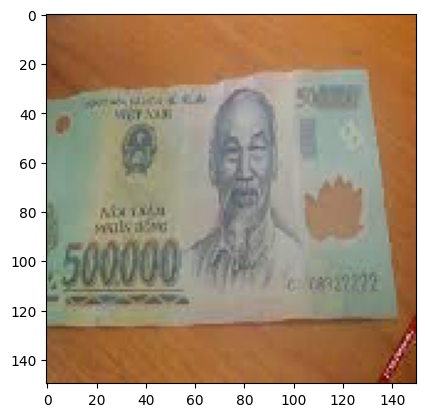

1/1 [==============================] - 0s 35ms/step
Đây là  : 5.000


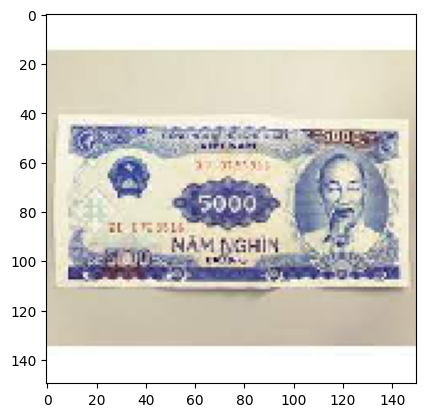

1/1 [==============================] - 0s 19ms/step
Đây là  : 10.000


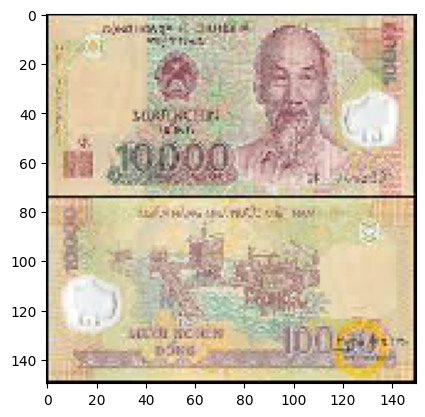

1/1 [==============================] - 0s 26ms/step
Đây là  : 20.000


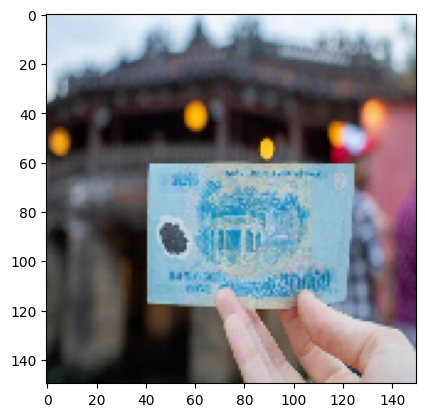

1/1 [==============================] - 0s 24ms/step
Đây là  : 50.000


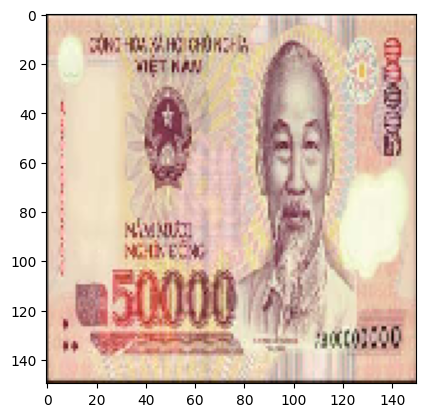

1/1 [==============================] - 0s 18ms/step
Đây là  : 100.000


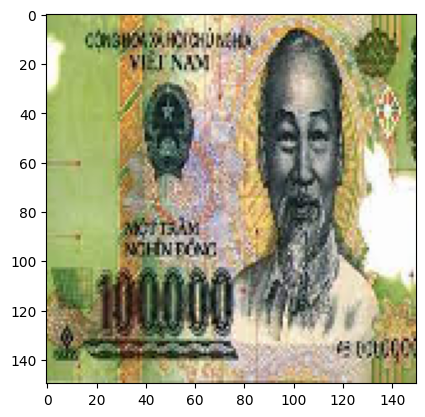

In [56]:
#Test(nhận dạng 6 loại tiền)
folder='/content/drive/MyDrive/gk/money/test/'
for i in os.listdir(folder):
  img=load_img(folder+i, target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['10.000', '100.000', '20.000', '5.000', '50.000', '500.000']
  print('Đây là  : {}'.format(class_name[result]))
  plt.show()